In [1]:
import glob

import pandas as pd

import seaborn as sns

from tqdm import tqdm

tqdm.pandas()

In [2]:
data_base_dir = "data/by_date"

dates = []
dfs = {}
for fpath in glob.glob(data_base_dir + "/*"):
    df = pd.read_csv(fpath)
    date = df["date"].iloc[0]
    dfs[date] = df[df["question"].notnull()]
    dates.append(date)

dates.sort()

In [7]:
df = pd.concat(dfs)
df

speaker  \
1984-10-07 0   Walter Mondale   
           1   Walter Mondale   
           2   Walter Mondale   
           3   Walter Mondale   
           4    Ronald Reagan   
...                       ...   
2004-09-30 13  George W. Bush   
           14      John Kerry   
           15  George W. Bush   
           16      John Kerry   
           17  George W. Bush   

                                                            text  type  \
1984-10-07 0   One of the key tests of leadership is whether ...  Pres   
           1   Absolutely, and I proposed over a hundred bill...  Pres   
           2   Well, first of all, I think the first answer t...  Pres   
           3   Well, I think were getting better all the time...  Pres   
           4   Well, whether he does or not, let me suggest m...  Pres   
...                                                          ...   ...   
2004-09-30 13  North Korea, first, I do. Let me say — I certa...  Pres   
           14  Well, Ill tell you exactly why not, but I firs...  Pres   
           15  Thats a loaded question. Well, first of all, I...  Pres   
           16  Nuclear proliferation. Nuclear proliferation. ...  Pres   
           17  No, I dont think its ok, and said so publicly....  Pres   

               election_year        date  candidate  \
1984-10-07 0            1984  1984-10-07          1   
           1            1984  1984-10-07          1   
           2            1984  1984-10-07          1   
           3            1984  1984-10-07          1   
           4            1984  1984-10-07          1   
...                      ...         ...        ...   
2004-09-30 13           2004  2004-09-30          1   
           14           2004  2004-09-30          1   
           15           2004  2004-09-30          1   
           16           2004  2004-09-30          1   
           17           2004  2004-09-30          1   

                                                             qud  \
1984-10-07 0   What is the significance of addressing the eno...   
           1   What areas of federal spending can be cut with...   
           2   How will your approach to leadership as Presid...   
           3   What is the importance of contrasting leadersh...   
           4   What are the key principles that should guide ...   
...                                                          ...   
2004-09-30 13  What is the approach of the United States rega...   
           14  What is the rationale for the United States ta...   
           15  What are the concerns about Senator Kerry's co...   
           16  What steps should the United States take to ef...   
           17  What is the significance of maintaining checks...   

                                                        question  \
1984-10-07 0   Mr. Mondale, the Carter- Mondale administratio...   
           1   Mr. Mondale, one other way to attack the defic...   
           2   Mr. President, Mr. Mondale, the public opinion...   
           3   You have said, Mr. Mondale, that the polls hav...   
           4   Mr. President, the issue is leadership in pers...   
...                                                          ...   
2004-09-30 13  New question, Mr. President. Do you believe th...   
           14  New question, two minutes. Senator Kerry, you ...   
           15  New question, President Bush. Clearly, as we h...   
           16  New question, two minutes, Senator Kerry. If y...   
           17  All right. Mr. President, this is the last que...   

               similarity_cls  similarity_max  similarity_mean  \
1984-10-07 0         0.743004        0.924760         0.824508   
           1         0.823902        0.926741         0.765139   
           2         0.778710        0.919676         0.780097   
           3         0.873707        0.912213         0.766470   
           4         0.870184        0.902403         0.722577   
...                       ...             ...

In [23]:
for i, d in enumerate(dates):
    print(f"{i}\t{d}\t{len(dfs[d])}\t{len(dfs[d].columns)}")

0	1960-09-26	10	12
1	1976-09-23	20	12
2	1980-09-21	12	12
3	1984-10-07	30	12
4	1988-09-25	23	12
5	1992-10-11	11	12
6	1996-10-06	21	12
7	2000-10-03	26	12
8	2004-09-30	18	12
9	2008-09-26	17	12
10	2012-10-03	25	12
11	2016-09-26	19	12
12	2020-09-29	39	12


In [ ]:
df_melted = pd.melt(
    df,
    id_vars=[
        col
        for col in df.columns
        if col
        not in [
            "similarity_cls",
            "similarity_mean",
            "similarity_max",
            "similarity_sbert",
        ]
    ],
    var_name="measure",
    value_name="similarity",
)
df_melted

,speaker,text,type,election_year,date,candidate,qud,question,measure,similarity
0,Walter Mondale,One of the key tests of leadership is whether ...,Pres,1984,1984-10-07,1,What is the significance of addressing the eno...,"Mr. Mondale, the Carter- Mondale administratio...",similarity_cls,0.743004
1,Walter Mondale,"Absolutely, and I proposed over a hundred bill...",Pres,1984,1984-10-07,1,What areas of federal spending can be cut with...,"Mr. Mondale, one other way to attack the defic...",similarity_cls,0.823902
2,Walter Mondale,"Well, first of all, I think the first answer t...",Pres,1984,1984-10-07,1,How will your approach to leadership as Presid...,"Mr. President, Mr. Mondale, the public opinion...",similarity_cls,0.778710
3,Walter Mondale,"Well, I think were getting better all the time...",Pres,1984,1984-10-07,1,What is the importance of contrasting leadersh...,"You have said, Mr. Mondale, that the polls hav...",similarity_cls,0.873707
4,Ronald Reagan,"Well, whether he does or not, let me suggest m...",Pres,1984,1984-10-07,1,What are the key principles that should guide ...,"Mr. President, the issue is leadership in pers...",similarity_cls,0.870184
...,...,...,...,...,...,...,...,...,...,...
1079,George W. Bush,"North Korea, first, I do. Let me say — I certa...",Pres,2004,2004-09-30,1,What is the approach of the United States rega...,"New question, Mr. President. Do you believe th...",similarity_sbert,0.677206
1080,John Kerry,"Well, Ill tell you exactly why not, but I firs...",Pres,2004,2004-09-30,1,What is the rationale for the United States ta...,"New question, two minutes. Senator Kerry, you ...",similarity_sbert,0.431954
1081,George W. Bush,"Thats a loaded question. Well, first of all, I...",Pres,2004,2004-09-30,1,What are the concerns about Senator Kerry's co...,"New question, President Bush. Clearly, as we h...",similarity_sbert,0.620596
1082,John Kerry,Nuclear proliferation. Nuclear proliferation. ...,Pres,2004,2004-09-30,1,What steps should the United States take to ef...,"New question, two minutes, Senator Kerry. If y...",similarity_sbert,0.423019


<Axes: xlabel='date', ylabel='similarity'>

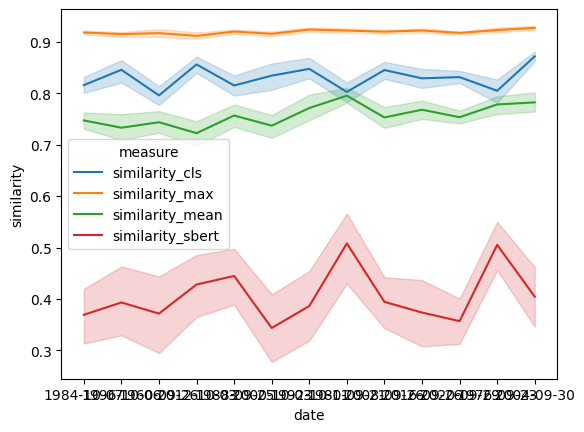

In [26]:
sns.lineplot(data=df_melted, x="date", y="similarity", hue="measure")